# Future Sales Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
#dataset = https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales?select=Train-Set.csv
#dataset = https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales?select=Test-Set.csv

train = pd.read_csv("D:/SpaceScan/SSVIP-Data-Science-FutureSalesDetection/Train-set.csv")
test = pd.read_csv("D:/SpaceScan/SSVIP-Data-Science-FutureSalesDetection/Test-set.csv")
test1 = test.copy()
train.shape,test.shape

((8523, 12), (5681, 11))

In [3]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test["OutletSize"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [5]:
train.nunique()

ProductID            1559
Weight                415
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              3
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

In [6]:
test.nunique()

ProductID            1543
Weight                410
FatContent              5
ProductVisibility    5277
ProductType            16
MRP                  4402
OutletID               10
EstablishmentYear       9
OutletSize              3
LocationType            3
OutletType              4
dtype: int64

In [7]:
train.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [8]:
size1 = {"Small":1,"Medium":2,"High":3}
train["OutletSize"] = train["OutletSize"].map(size1)
train["Weight"] = train["Weight"].fillna(train.Weight.mean())
train["OutletSize"] = train["OutletSize"].fillna(train["OutletSize"].median())

In [9]:
train.isna().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [10]:
size1 = {"Small":1,"Medium":2,"High":3}
test["OutletSize"] = test["OutletSize"].map(size1)
test["Weight"] = test["Weight"].fillna(test.Weight.mean())
test["OutletSize"] = test["OutletSize"].fillna(test["OutletSize"].median())

In [11]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


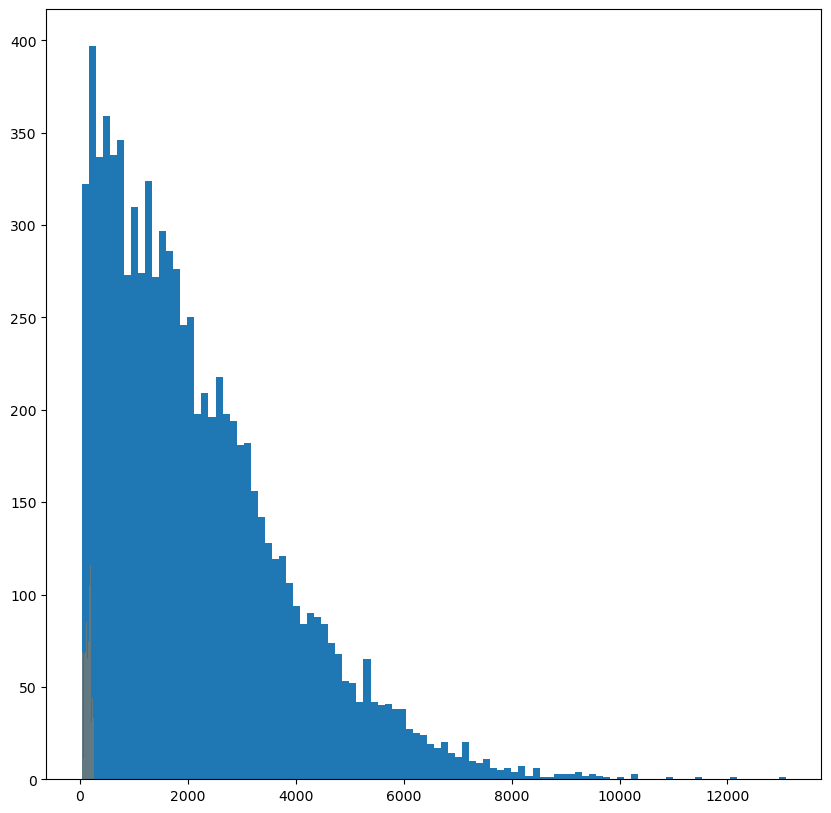

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,10)
plt.hist(train["OutletSales"],bins = 100)

plt.hist(train["MRP"],alpha = 0.3,bins = 150)
plt.show()

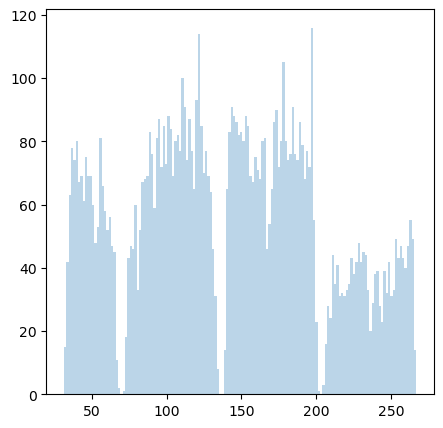

In [13]:
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(train["MRP"],alpha = 0.3,bins = 150)
plt.show()

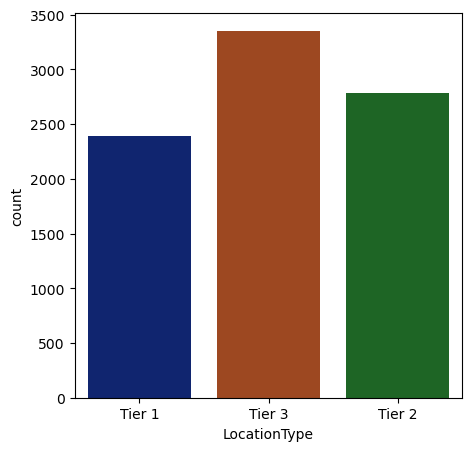

In [14]:
import matplotlib.pyplot as plt

sns.countplot(data=train, x="LocationType", palette="dark")
plt.show()

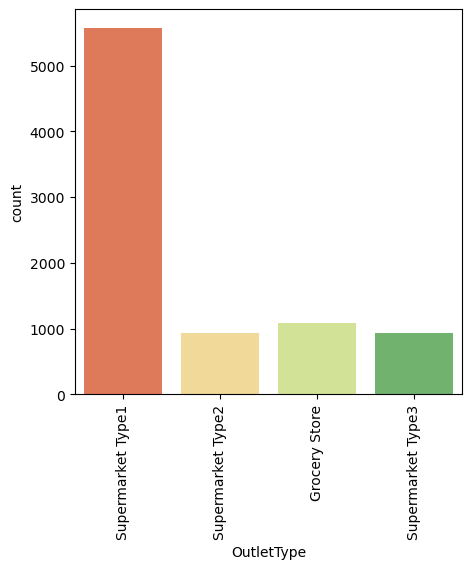

In [15]:
sns.countplot(data=train, x="OutletType", palette="RdYlGn")
plt.xticks(rotation=90)
plt.show()

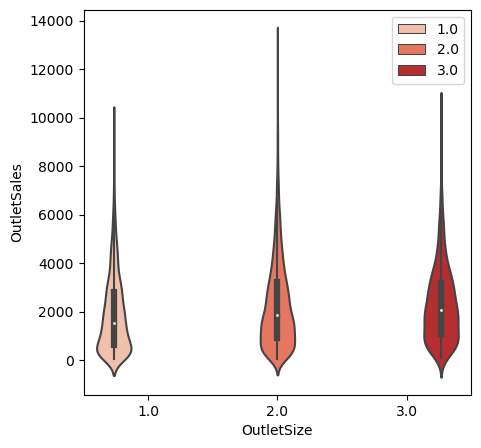

In [16]:
sns.violinplot(x=train["OutletSize"],y=train["OutletSales"],hue = train["OutletSize"],palette = "Reds")
plt.legend()
plt.show()

In [17]:
train.drop(labels = ["EstablishmentYear"],inplace = True,axis =1)
test.drop(labels = ["EstablishmentYear"],inplace = True,axis =1)

In [18]:
sale = ['OutletSize','OutletType','LocationType','FatContent',"ProductType"]
X = pd.get_dummies(train[sale])
train = pd.concat([train,X],axis=1)

train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,OutletSize,LocationType,OutletType,...,ProductType_Fruits and Vegetables,ProductType_Hard Drinks,ProductType_Health and Hygiene,ProductType_Household,ProductType_Meat,ProductType_Others,ProductType_Seafood,ProductType_Snack Foods,ProductType_Soft Drinks,ProductType_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2.0,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2.0,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3.0,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [19]:
sale = ['OutletSize','OutletType','LocationType','FatContent',"ProductType"]
X = pd.get_dummies(test[sale])
test = pd.concat([test,X],axis=1)

In [20]:
train.drop(labels = ["OutletSize",'LocationType',"OutletType",'FatContent','OutletID','ProductID',"ProductType"],axis=1,inplace = True)
test.drop(labels = ["OutletSize",'LocationType',"OutletType",'FatContent','OutletID','ProductID',"ProductType"],axis=1,inplace = True)

In [21]:
train.head()

,Weight,ProductVisibility,MRP,OutletSales,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,LocationType_Tier 1,LocationType_Tier 2,...,ProductType_Fruits and Vegetables,ProductType_Hard Drinks,ProductType_Health and Hygiene,ProductType_Household,ProductType_Meat,ProductType_Others,ProductType_Seafood,ProductType_Snack Foods,ProductType_Soft Drinks,ProductType_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
X_train = train.drop(labels = ["OutletSales"],axis=1)
y_train = train["OutletSales"]
X_train.shape,y_train.shape

((8523, 31), (8523,))

In [23]:
train.head()

,Weight,ProductVisibility,MRP,OutletSales,OutletType_Grocery Store,OutletType_Supermarket Type1,OutletType_Supermarket Type2,OutletType_Supermarket Type3,LocationType_Tier 1,LocationType_Tier 2,...,ProductType_Fruits and Vegetables,ProductType_Hard Drinks,ProductType_Health and Hygiene,ProductType_Household,ProductType_Meat,ProductType_Others,ProductType_Seafood,ProductType_Snack Foods,ProductType_Soft Drinks,ProductType_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: OutletSales, dtype: float64

In [25]:
from sklearn import preprocessing

x = X_train.values 
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)


In [26]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.282525,0.048866,0.927507,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.4)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
preds = model.predict(X_test)

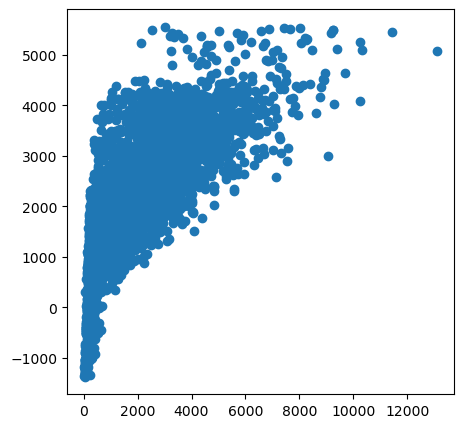

In [30]:
plt.scatter(y_test, preds)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_5976\314155612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-preds),bins=50)


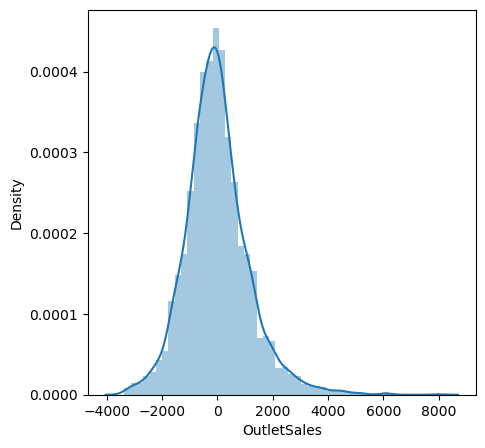

In [31]:
sns.distplot((y_test-preds),bins=50)
plt.show()

In [32]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 849.3310409384163
MSE: 1324139.1573333286
RMSE: 1150.7124564083456


In [33]:
predictions = model.predict(df_test)
final = pd.DataFrame({"ProductID":test1["ProductID"],"OutletID":test1["OutletID"],"OutletSales":abs(predictions)})
final.head()

,ProductID,OutletID,OutletSales
0,FDW58,OUT049,1857.5
1,FDW14,OUT017,1466.0
2,NCN55,OUT010,1828.0
3,FDQ58,OUT017,2560.5
4,FDY38,OUT027,5050.0


In [34]:
final.to_csv('Final.csv',index=False,header=True)